## Exploratory Data Analysis on US Visa Prediction 

### Life cycle of Machine learning Project

1. **Understanding the Problem Statement** – Define the objective and success criteria clearly.

2. **Data Collection** – Gather relevant data from various sources.

3. **Exploratory Data Analysis (EDA)** – Understand patterns, trends, and anomalies in the data.

4. **Data Cleaning** – Remove inconsistencies, errors, and irrelevant information.

5. **Data Preprocessing** – Transform data into a format suitable for modeling.

6. **Model Training** – Feed processed data into algorithms to learn patterns.

7. **Model Prediction** – Use the trained model to make accurate forecasts or classifications.

### About

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

### **1. Problem statement**

- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.

- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the data given to build a Classification model:**

- This model is to check if a Visa gets approved or not based on the given dataset.

- This can be used to recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

### **2. Data Collection**

- The Dataset is part of Office of Foreign Labor Certification (OFLC)

- The data consists of 25480 Rows and 12 Columns

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Importing the CSV file as pandas DataFrame

df = pd.read_csv("dataset/Visa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
# Number of rows and columns

df.shape

(25480, 12)

In [4]:
# Summary Statistics of the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [5]:
# Datatypes in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### **3. Exploratory Data Analysis**

In [6]:
# Numerical and Categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"We have {len(numerical_features)} numerical features : {numerical_features}")

print(f"We have {len(categorical_features)} numerical features : {categorical_features}")

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
We have 9 numerical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# Proportion of count data on categorical features

for column in categorical_features:
    print(df[column].value_counts(normalize = True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

**Insights**

- `case_id` have unique vlaues for each column which can be dropped as it it of no importance

- `continent` column is highly biased towards asia. Hence we can combine other categories to form a single category.

- `unit_of_wage` seems to be an important column as most of them are yearly contracts.


### Univariate Analysis

The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

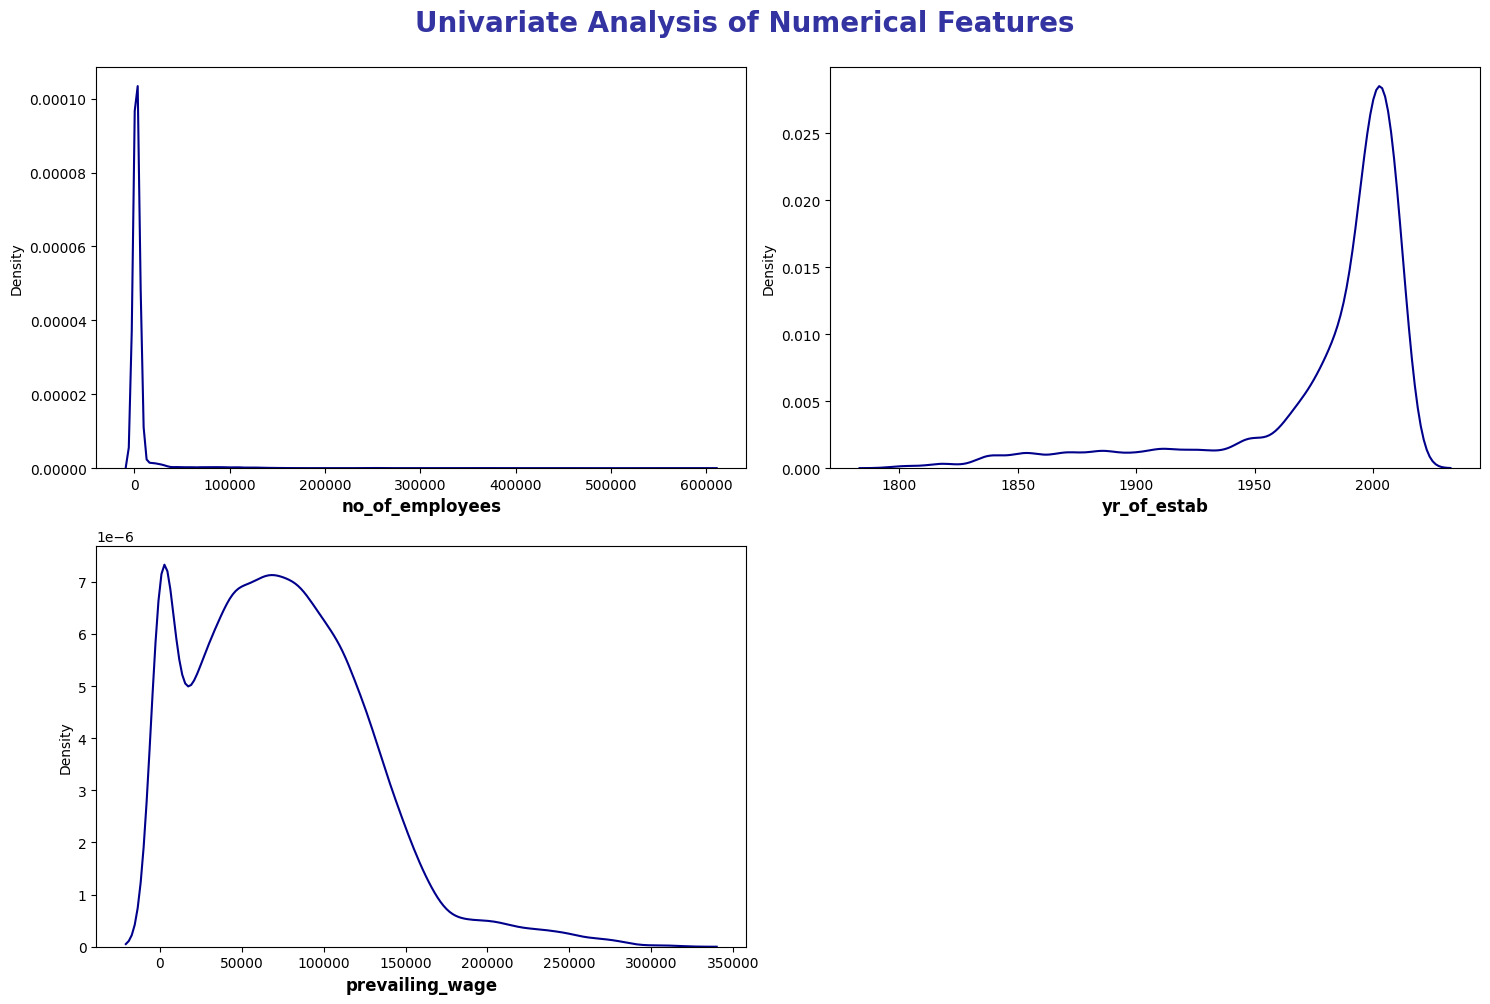

In [19]:
# Univariate Analysis of Numerical features

plt.figure(figsize = (15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize = 20, fontweight = 'bold', color = 'darkblue', alpha = 0.8, y = 1)

for i in range(0, len(numerical_features)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x = df[numerical_features[i]], color = 'darkblue')
    plt.xlabel(numerical_features[i], fontsize = 12, fontweight = 'bold')
    plt.tight_layout()

**Insights**

- `no_of_employees` column looks more skewed but it may be because of outliers.

- `yr_of_estab` is a discrete feature.

- `privailing-wage` is a right-skewed distribution.

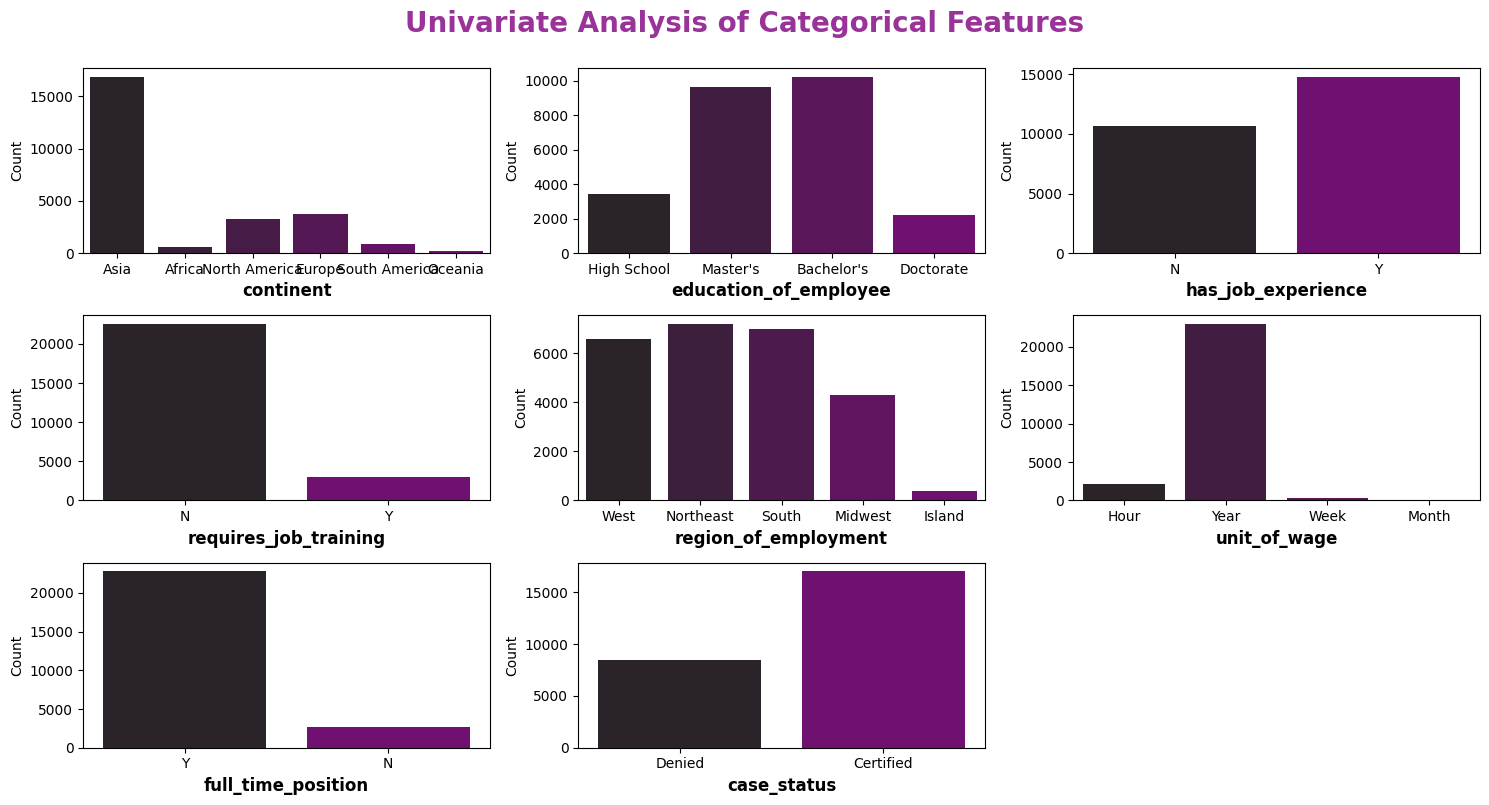

In [ ]:
# Univariate Analysis on Categorical features

categorical_features.remove('case_id') # not required
plt.figure(figsize = (15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize = 20, fontweight = 'bold', color = 'purple', alpha = 0.8, y = 1)

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    unique_vals = df[feature].nunique()
    palette = sns.color_palette("dark:purple", unique_vals)  # multiple shades per feature
    sns.countplot(x = df[feature], palette = palette)
    plt.xlabel(feature, fontsize = 12, fontweight = 'bold')
    plt.ylabel('Count', fontsize = 10)
    plt.tight_layout()

**Insights**

- `requires_job_training`, `unit_of_wage`, `full_time_position` and `continent` coulmns have signle category dominating.

- In rest of the columns are balanced.

### Multivariate Analysis

Multivariate analysis is the analysis of two or more variables to determine relationships between them. It is used to understand how multiple variables interact with each other and how they affect the outcome of interest.

In [20]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) <= 25]

continuous_features = [feature for feature in numerical_features if len(df[feature].unique()) > 25]

print(f"We have {len(discrete_features)} discrete features : {discrete_features}")

print(f"We have {len(continuous_features)} continuous features : {continuous_features}")


We have 0 discrete features : []
We have 3 continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


### Correlation

`Correlation` is a statistical measure that describes the extent to which two variables are related. It indicates the strength and direction of a linear relationship between two variables.

### Multicollinearity

`Multicollinearity` in statistics refers to a situation where two or more independent variables in a regression model are highly correlated with each other, meaning they are not truly independent. This high correlation can cause issues in regression analysis, making it difficult to isolate the individual effects of each predictor on the dependent variable. 

In [21]:
# Check Multicollinearity in Numerical features

df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


No multicollinearity between the features.

- A **chi-squared test (also chi-square or χ2 test)** is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test.

- A **chi-square statistic** is one way to show relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status.

Null Hypothesis (H0): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1): The Feature and Target column are not independent (Correalted)

In [22]:
# Check Multicollinearity in Categorical features

from scipy.stats import chi2_contingency
chi2_test = []

for feature in categorical_features:
    
    # chi2_contingency returns 4 values: (chi2_statistic, p_value, dof, expected_frequencies), [1] picks the p-value.
    # If p_value < 0.05: Reject H₀, There is a statistical relationship between the feature and case_status.
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        # pd.crosstab() Builds a cross-tabulation table (like a pivot table) showing counts for each combination of case_status (target) and the current feature.
        chi2_test.append('Reject Null Hypothesis')
    else:
        # Fail to reject H₀ → No significant relationship.
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data = [categorical_features, chi2_test]).T
result.columns = ['Feature', 'Hypothesis Result']
result

,Feature,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


**Insights**

- Here `requires_job_training` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.